**IMPORTING LIBRARIES**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**IMPORTING FEATURES AND LABELS DATA**

In [0]:
df1 = pd.read_csv("drive/My Drive/safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df2 = pd.read_csv("drive/My Drive/safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df3 = pd.read_csv("drive/My Drive/safety/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df4 = pd.read_csv("drive/My Drive/safety/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df5 = pd.read_csv("drive/My Drive/safety/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df6 = pd.read_csv("drive/My Drive/safety/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df7 = pd.read_csv("drive/My Drive/safety/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df8 = pd.read_csv("drive/My Drive/safety/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df9 = pd.read_csv("drive/My Drive/safety/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
df10 = pd.read_csv("drive/My Drive/safety/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")

In [0]:
#Merging 10 features data into 1
df_f = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
#Loading labels data
labels = pd.read_csv('drive/My Drive/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

In [0]:
#check rows and columns length
print(df_f.shape)
print(labels.shape)

(16135561, 11)
(20018, 2)


**Exploratory Data Analysis**

In [0]:
#Delete if there is null value
df_f.dropna(inplace=True)
labels.dropna(inplace=True)

In [0]:
#Group data with the same bookingID by add mean, sum, max, and min column
data = pd.DataFrame()
for col in df_f.columns:
    if col != "bookingID" and col != "label":
        temp = df_f.groupby("bookingID")[col].agg(["mean", "sum", "max", "min"])
        data[col + "_mean"] = temp["mean"]
        data[col + "_sum"] = temp["sum"]
        data[col + "_max"] = temp["max"]
        data[col + "_min"] = temp["min"]

In [0]:
data.head()

,Accuracy_mean,Accuracy_sum,Accuracy_max,Accuracy_min,Bearing_mean,Bearing_sum,Bearing_max,Bearing_min,acceleration_x_mean,acceleration_x_sum,acceleration_x_max,acceleration_x_min,acceleration_y_mean,acceleration_y_sum,acceleration_y_max,acceleration_y_min,acceleration_z_mean,acceleration_z_sum,acceleration_z_max,acceleration_z_min,gyro_x_mean,gyro_x_sum,gyro_x_max,gyro_x_min,gyro_y_mean,gyro_y_sum,gyro_y_max,gyro_y_min,gyro_z_mean,gyro_z_sum,gyro_z_max,gyro_z_min,second_mean,second_sum,second_max,second_min,Speed_mean,Speed_sum,Speed_max,Speed_min
bookingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10.165339,10206.000,48.000,4.0,176.526099,177232.203582,359.979767,0.037464,-0.711264,-714.108606,4.782614,-4.692294,-9.613822,-9652.277441,-6.119916,-12.764703,-1.619658,-1626.136658,2.318857,-6.251807,0.003328,3.340816,0.438371,-0.392537,-0.006118,-6.142259,0.469724,-0.609930,-0.004188,-4.204491,0.372807,-0.731892,903.526892,907141.0,1589.0,0.0,8.994822,9030.801222,22.946083,-1.0
1,3.718763,3164.667,7.709,3.0,124.198590,105693.000000,337.000000,0.000000,-0.525406,-447.120797,3.813341,-5.352994,9.532086,8111.805312,12.536156,6.623425,-2.198999,-1871.348183,1.481293,-5.355455,-0.002467,-2.099544,0.126536,-0.125367,-0.007540,-6.416598,0.470837,-0.678183,0.000405,0.344877,0.235131,-0.121265,581.175088,494580.0,1034.0,0.0,7.881588,6707.231233,21.882141,-1.0
2,3.930626,766.472,8.000,3.0,173.794872,33890.000000,354.000000,1.000000,0.306786,59.823351,1.956122,-2.971295,9.843183,1919.420684,13.333716,7.941810,0.139347,27.172626,2.312870,-3.282551,0.006458,1.259283,0.282162,-0.155218,-0.012861,-2.507892,0.431695,-0.462000,0.002597,0.506505,0.255884,-0.125907,339.441026,66191.0,825.0,0.0,3.157213,615.656528,9.360483,0.0
4,10.000000,10940.000,10.000,10.0,151.807013,166076.872711,353.855377,2.271227,-0.365117,-399.438525,2.019635,-2.866458,-9.406439,-10290.643753,-7.064984,-18.847833,-2.613639,-2859.321069,0.296381,-9.374869,-0.022884,-25.035151,0.438732,-0.420507,0.023232,25.415907,0.652628,-0.506531,-0.000376,-0.411573,0.505220,-0.348189,547.495430,598960.0,1094.0,0.0,6.150996,6729.190006,19.780001,0.0
6,4.586721,5022.460,12.000,3.0,197.812785,216605.000000,359.000000,0.000000,0.490616,537.224988,5.593026,-4.352792,9.538043,10444.157133,13.249917,6.469330,2.355059,2578.789598,7.977724,-2.140482,0.003877,4.245843,0.362202,-0.253551,0.000436,0.477217,0.532123,-0.621802,0.002930,3.207864,0.364534,-0.348345,547.000000,598965.0,1094.0,0.0,4.628921,5068.669039,16.394695,0.0


In [0]:
#Check bookingID row from label. Since features row and labels row are not in  the same length, we check if there is duplicate value in labels data

labels[labels['bookingID'].duplicated(keep=False)]
labels = labels.drop_duplicates(subset=['bookingID'], keep='first')

In [0]:
print(data.shape)
print(labels.shape)

(20000, 40)
(20000, 2)


In [0]:
#Merge features and label data by bookingID
data = pd.merge(data, labels, on="bookingID")
print(data.shape)

(20000, 42)


In [0]:
data.head()

,bookingID,Accuracy_mean,Accuracy_sum,Accuracy_max,Accuracy_min,Bearing_mean,Bearing_sum,Bearing_max,Bearing_min,acceleration_x_mean,acceleration_x_sum,acceleration_x_max,acceleration_x_min,acceleration_y_mean,acceleration_y_sum,acceleration_y_max,acceleration_y_min,acceleration_z_mean,acceleration_z_sum,acceleration_z_max,acceleration_z_min,gyro_x_mean,gyro_x_sum,gyro_x_max,gyro_x_min,gyro_y_mean,gyro_y_sum,gyro_y_max,gyro_y_min,gyro_z_mean,gyro_z_sum,gyro_z_max,gyro_z_min,second_mean,second_sum,second_max,second_min,Speed_mean,Speed_sum,Speed_max,Speed_min,label
0,0,10.165339,10206.000,48.000,4.0,176.526099,177232.203582,359.979767,0.037464,-0.711264,-714.108606,4.782614,-4.692294,-9.613822,-9652.277441,-6.119916,-12.764703,-1.619658,-1626.136658,2.318857,-6.251807,0.003328,3.340816,0.438371,-0.392537,-0.006118,-6.142259,0.469724,-0.609930,-0.004188,-4.204491,0.372807,-0.731892,903.526892,907141.0,1589.0,0.0,8.994822,9030.801222,22.946083,-1.0,0
1,1,3.718763,3164.667,7.709,3.0,124.198590,105693.000000,337.000000,0.000000,-0.525406,-447.120797,3.813341,-5.352994,9.532086,8111.805312,12.536156,6.623425,-2.198999,-1871.348183,1.481293,-5.355455,-0.002467,-2.099544,0.126536,-0.125367,-0.007540,-6.416598,0.470837,-0.678183,0.000405,0.344877,0.235131,-0.121265,581.175088,494580.0,1034.0,0.0,7.881588,6707.231233,21.882141,-1.0,1
2,2,3.930626,766.472,8.000,3.0,173.794872,33890.000000,354.000000,1.000000,0.306786,59.823351,1.956122,-2.971295,9.843183,1919.420684,13.333716,7.941810,0.139347,27.172626,2.312870,-3.282551,0.006458,1.259283,0.282162,-0.155218,-0.012861,-2.507892,0.431695,-0.462000,0.002597,0.506505,0.255884,-0.125907,339.441026,66191.0,825.0,0.0,3.157213,615.656528,9.360483,0.0,1
3,4,10.000000,10940.000,10.000,10.0,151.807013,166076.872711,353.855377,2.271227,-0.365117,-399.438525,2.019635,-2.866458,-9.406439,-10290.643753,-7.064984,-18.847833,-2.613639,-2859.321069,0.296381,-9.374869,-0.022884,-25.035151,0.438732,-0.420507,0.023232,25.415907,0.652628,-0.506531,-0.000376,-0.411573,0.505220,-0.348189,547.495430,598960.0,1094.0,0.0,6.150996,6729.190006,19.780001,0.0,1
4,6,4.586721,5022.460,12.000,3.0,197.812785,216605.000000,359.000000,0.000000,0.490616,537.224988,5.593026,-4.352792,9.538043,10444.157133,13.249917,6.469330,2.355059,2578.789598,7.977724,-2.140482,0.003877,4.245843,0.362202,-0.253551,0.000436,0.477217,0.532123,-0.621802,0.002930,3.207864,0.364534,-0.348345,547.000000,598965.0,1094.0,0.0,4.628921,5068.669039,16.394695,0.0,0


**Visualize the Data**

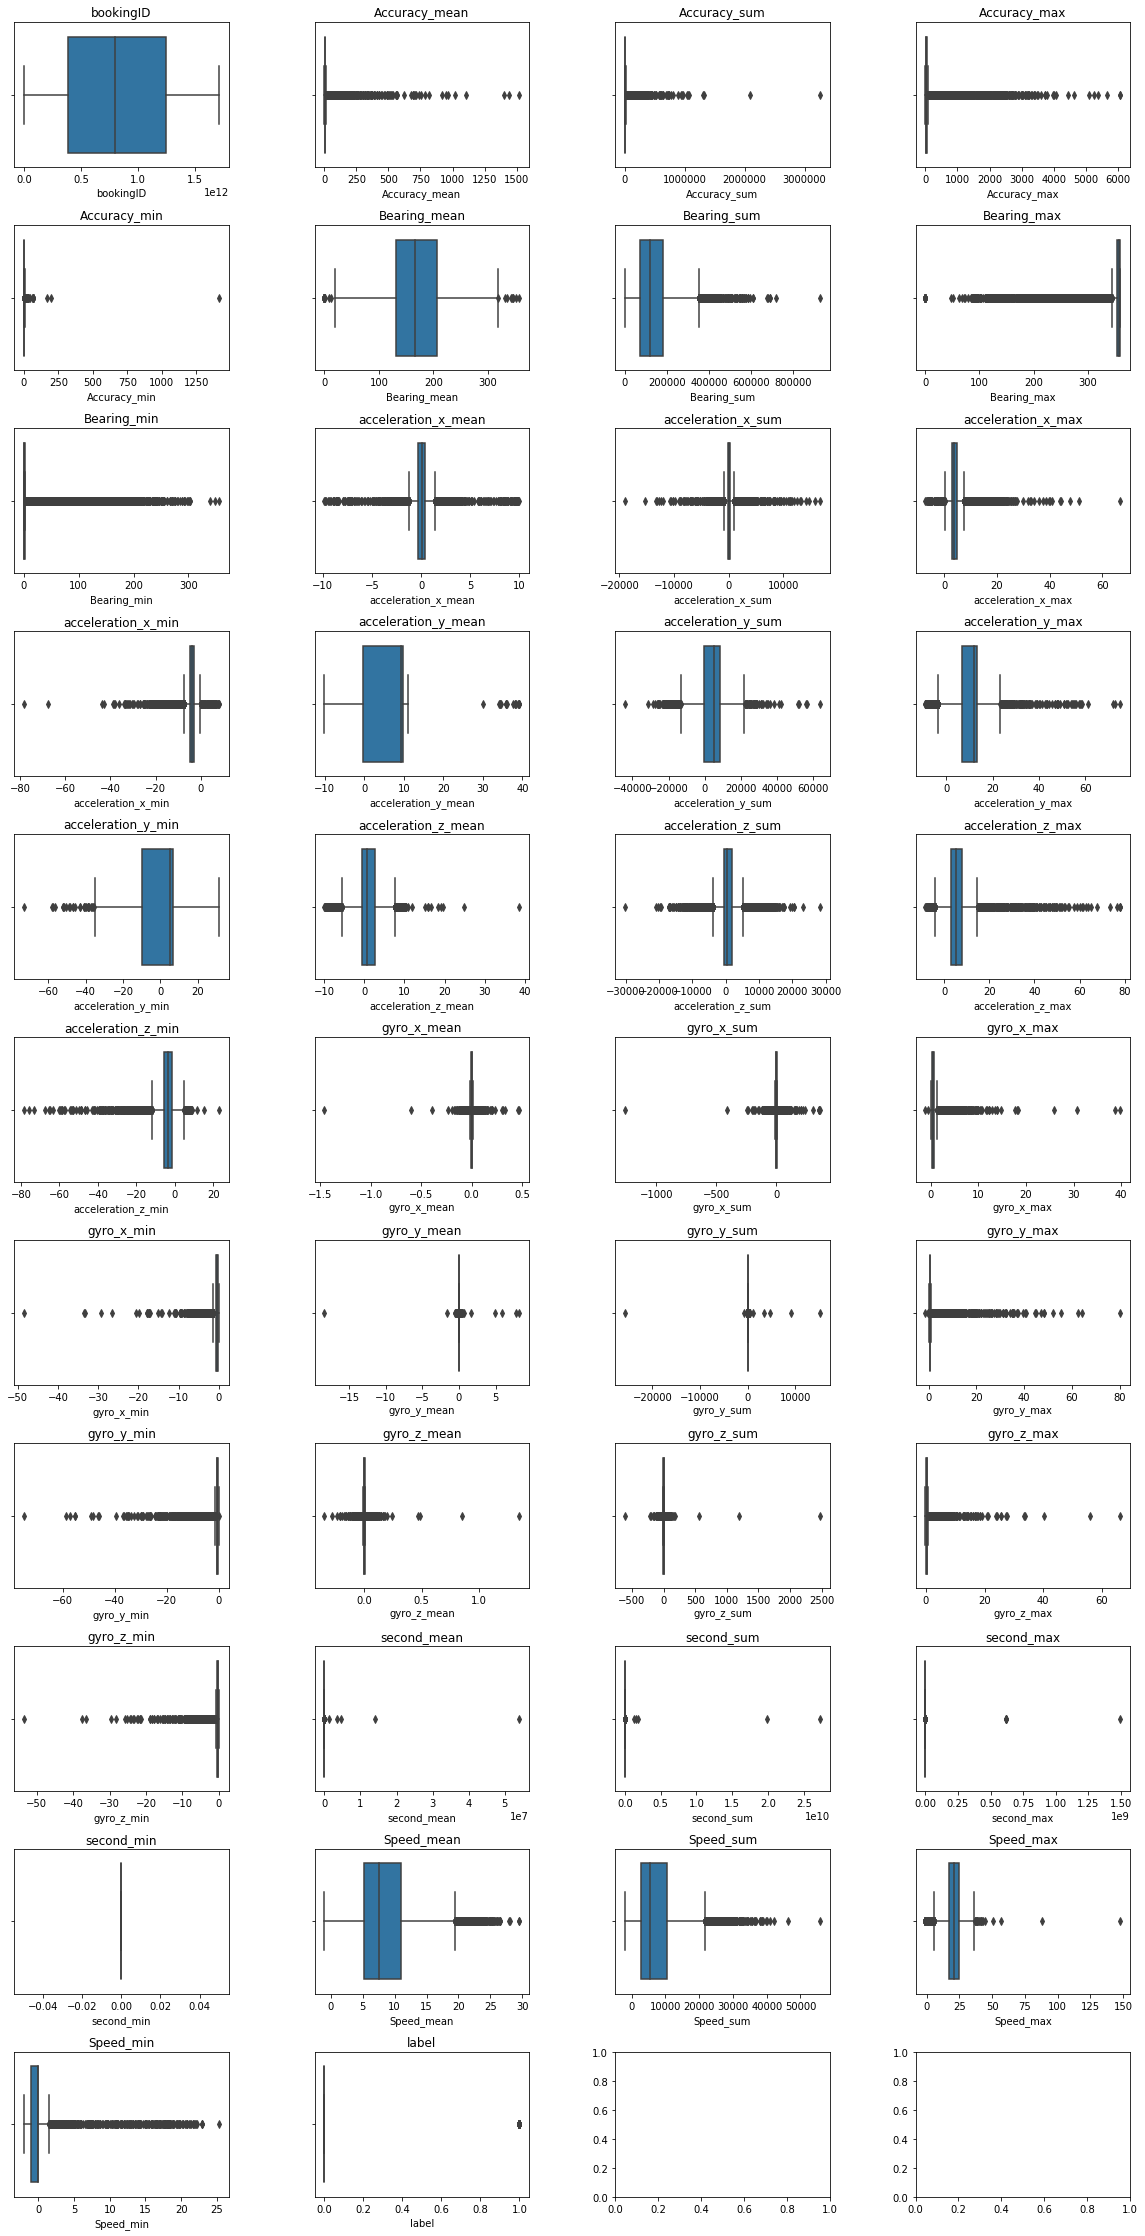

In [0]:
#Visualizing 
fig, axes = plt.subplots(11, 4)
fig.set_figheight(40)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(data.columns)):
    row = i // 4
    column = i % 4
    sns.boxplot(data[data.columns[i]], ax=axes[row, column]).set_title("{}".format(data.columns[i]))

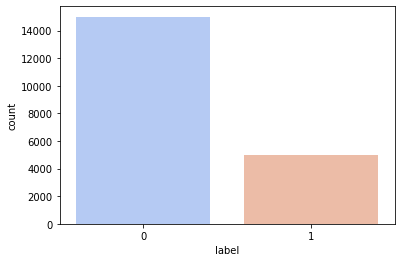

In [0]:
sns.countplot('label', data=data, palette='coolwarm')

**Feature Selection using 4 different methods**

In [0]:
X = data.iloc[:,1:41]  #independent columns
y = data.iloc[:,-1]    #target columns

In [0]:
feature_name = X.columns.tolist()

In [0]:
#RFE Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

#Linear Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=10)
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

#Random Forest Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

#LightGBM Selection
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

Fitting estimator with 40 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 30 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 20 features.


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 selected features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


10 selected features
10 selected features
10 selected features


In [0]:
# Put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# Count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 10
feature_selection_df = feature_selection_df.sort_values(['Total', 'Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(9)

,Feature,RFE,Logistics,Random Forest,LightGBM,Total
1,Speed_mean,True,True,True,True,4
2,Speed_max,True,True,True,True,4
3,second_mean,True,False,True,True,3
4,Speed_sum,True,False,True,True,3
5,second_max,False,False,True,True,2
6,gyro_z_min,False,True,False,True,2
7,gyro_z_max,False,False,True,True,2
8,acceleration_z_max,False,True,True,False,2
9,acceleration_x_max,False,True,True,False,2


In [0]:
#Creating new table for selected features
ft_df = feature_selection_df.head(9)

In [0]:
#Dividing X and Y value
Xnew = X[ft_df['Feature']]
y = y

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve, classification_report

Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.3, random_state=101)

In [0]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(Xnew_train,y_train)

predict_lr = logreg.predict(Xnew_test)
print('Logistic Regression')
print(classification_report(y_test, predict_lr))
print(confusion_matrix(y_test, predict_lr))

#KNN Classifier
knn = KNeighborsClassifier()
knn.fit(Xnew_train,y_train)

predict_knn = knn.predict(Xnew_test)
print('KNN Classifier')
print(classification_report(y_test, predict_knn))
print(confusion_matrix(y_test, predict_knn))

#Naive Bayes
nb = BernoulliNB()
nb.fit(Xnew_train, y_train)

predict_nb = nb.predict(Xnew_test)
print('Naive Bayes')
print(classification_report(y_test, predict_nb))
print(confusion_matrix(y_test, predict_nb))

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(Xnew_train, y_train)

predict_dt = dt.predict(Xnew_test)
print('Decision Tree')
print(classification_report(y_test, predict_dt))
print(confusion_matrix(y_test, predict_dt))

#Random Forest
rf = RandomForestClassifier()
rf.fit(Xnew_train, y_train)

predict_rf = rf.predict(Xnew_test)
print('Random Forest Classifier')
print(classification_report(y_test, predict_rf))
print(confusion_matrix(y_test, predict_rf))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4486
           1       0.85      0.03      0.07      1514

    accuracy                           0.75      6000
   macro avg       0.80      0.52      0.46      6000
weighted avg       0.78      0.75      0.66      6000

[[4477    9]
 [1462   52]]
KNN Classifier
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      4486
           1       0.47      0.26      0.34      1514

    accuracy                           0.74      6000
   macro avg       0.63      0.58      0.59      6000
weighted avg       0.70      0.74      0.71      6000

[[4038  448]
 [1118  396]]
Naive Bayes
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4486
           1       0.54      0.00      0.01      1514

    accuracy                           0.75      6000
   macro avg       0.64    

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.78      0.94      0.86      4486
           1       0.57      0.23      0.33      1514

    accuracy                           0.76      6000
   macro avg       0.68      0.59      0.59      6000
weighted avg       0.73      0.76      0.72      6000

[[4221  265]
 [1165  349]]


**IMPORT SKLEARN LIBRARIES FOR MODELING**

In [0]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, auc,roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.3, random_state=101)

In [0]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),
    #GLM
    linear_model.LogisticRegression(),
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors=10),
    #Trees    
    tree.DecisionTreeClassifier()
    ]


In [0]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(Xnew_train, y_train).predict(Xnew_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(Xnew_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(Xnew_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA ROC-AUC'] = roc_auc_score(y_test, predicted)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA ROC-AUC'], ascending = False, inplace = True)    
MLA_compare

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA ROC-AUC
0,RandomForestClassifier,0.9765,0.7620,0.568690,0.235139,0.587476
4,DecisionTreeClassifier,1.0000,0.6815,0.373001,0.385073,0.583308
3,KNeighborsClassifier,0.7887,0.7600,0.580087,0.177015,0.566884
1,LogisticRegression,0.7565,0.7548,0.852459,0.034346,0.516170
2,BernoulliNB,0.7516,0.7478,0.538462,0.004624,0.501643


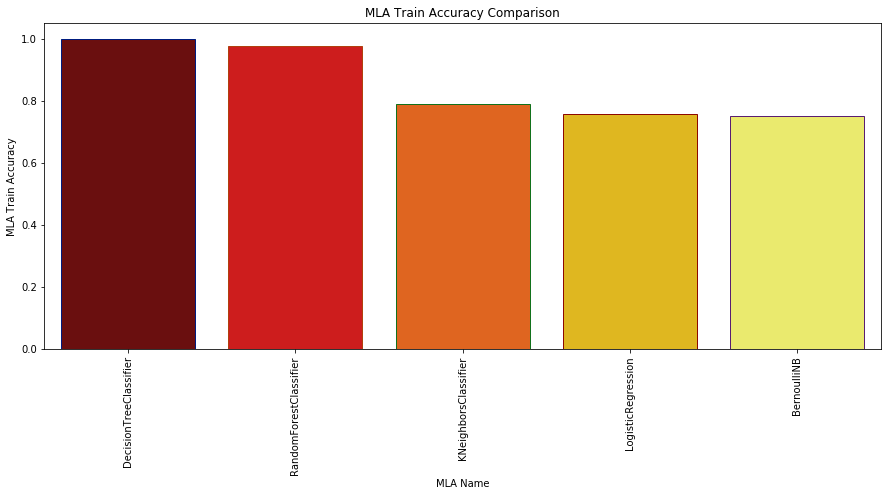

In [0]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

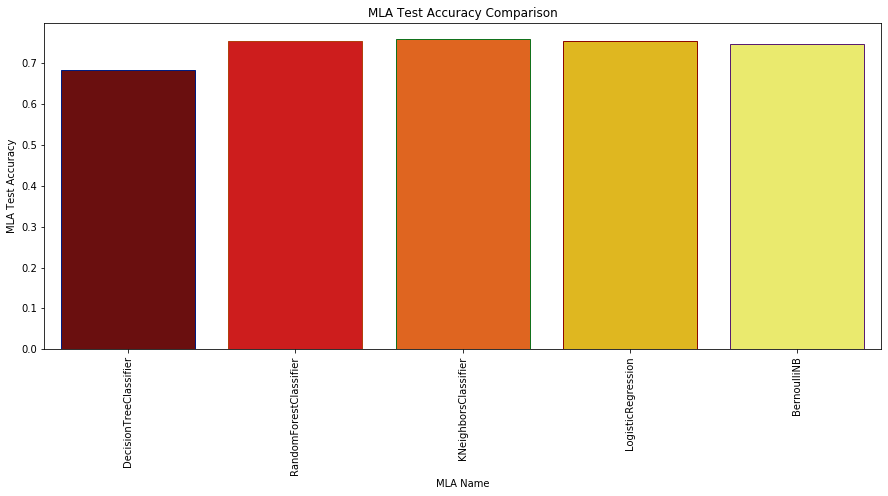

In [0]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

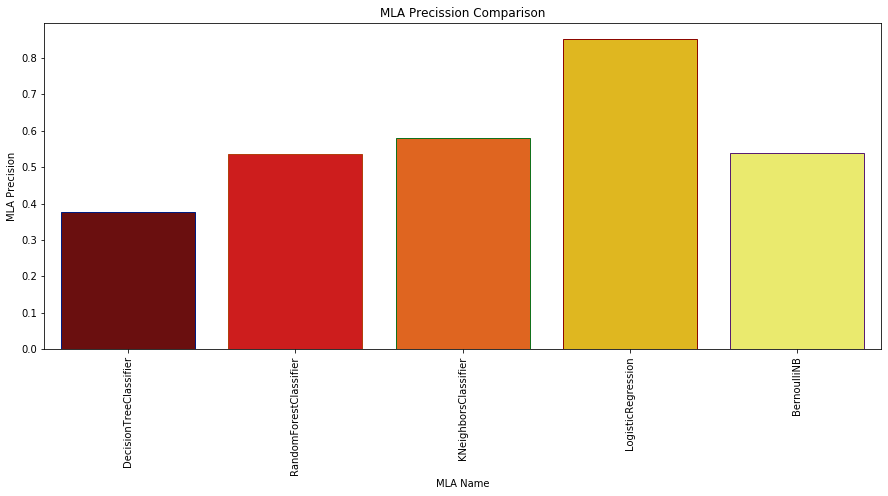

In [0]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precision",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

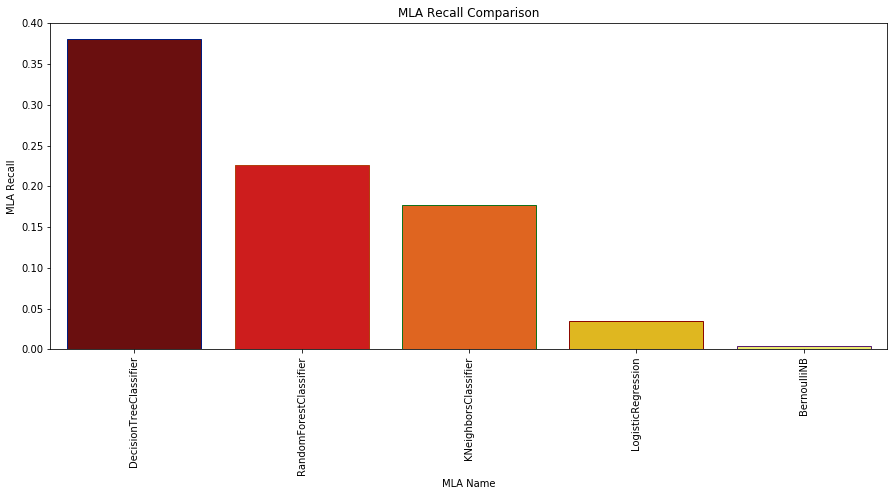

In [0]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

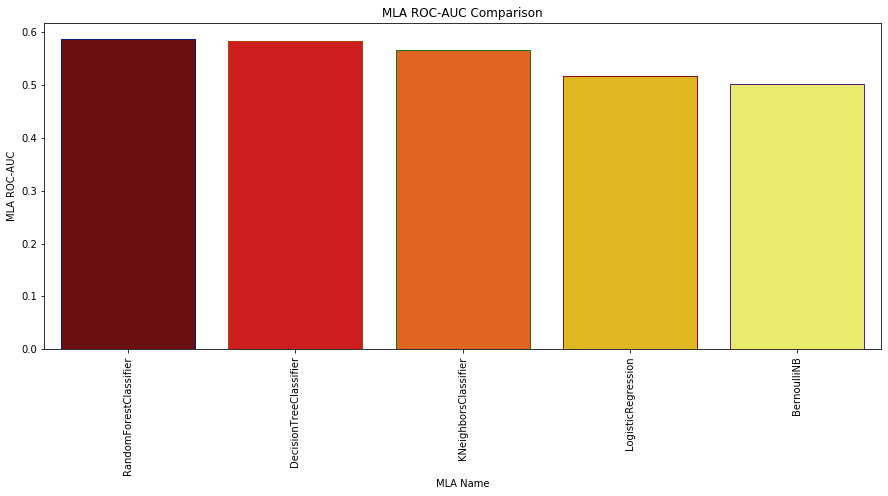

In [0]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA ROC-AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA ROC-AUC Comparison')
plt.show()

**RESAMPLING THE DATA**

In [0]:
print("Number  X_train dataset: ", Xnew_train.shape)
print("Number  y_train dataset: ", y_train.shape)
print("Number  X_test dataset: ", Xnew_test.shape)
print("Number  y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (14000, 9)
Number transactions y_train dataset:  (14000,)
Number transactions X_test dataset:  (6000, 9)
Number transactions y_test dataset:  (6000,)


In [0]:
from imblearn.over_sampling import SMOTE

print("Before Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Sampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(Xnew_train, y_train.ravel())

print("After Sampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After Sampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before Sampling, counts of label '1': 3479
Before Sampling, counts of label '0': 10521 

After Sampling, counts of label '1': 10521
After Sampling, counts of label '0': 10521


In [0]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_res,y_train_res)

predict_lr_res = logreg.predict(Xnew_test)

print('Logistic Regression')
print(classification_report(y_test, predict_lr_res))
print(confusion_matrix(y_test, predict_lr_res))

#KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)

predict_knn_res = knn.predict(Xnew_test)
print('KNN Classifier')
print(classification_report(y_test, predict_knn_res))
print(confusion_matrix(y_test, predict_knn_res))

#Naive Bayes
nb = BernoulliNB()
nb.fit(X_train_res,y_train_res)

predict_nb_res = nb.predict(Xnew_test)
print('Naive Bayes')
print(classification_report(y_test, predict_nb_res))
print(confusion_matrix(y_test, predict_nb_res))

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_res,y_train_res)

predict_dt_res = dt.predict(Xnew_test)
print('Decision Tree')
print(classification_report(y_test, predict_dt_res))
print(confusion_matrix(y_test, predict_dt_res))

#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

predict_rf_res = rf.predict(Xnew_test)
print('Random Forest Classifier')
print(classification_report(y_test, predict_rf_res))
print(confusion_matrix(y_test, predict_rf_res))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.63      0.72      4486
           1       0.36      0.63      0.46      1514

    accuracy                           0.63      6000
   macro avg       0.60      0.63      0.59      6000
weighted avg       0.71      0.63      0.65      6000

[[2821 1665]
 [ 567  947]]
KNN Classifier
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      4486
           1       0.34      0.53      0.41      1514

    accuracy                           0.62      6000
   macro avg       0.57      0.59      0.56      6000
weighted avg       0.69      0.62      0.64      6000

[[2912 1574]
 [ 716  798]]
Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.06      0.11      4486
           1       0.25      0.94      0.40      1514

    accuracy                           0.28      6000
   macro avg       0.51    

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4486
           1       0.42      0.42      0.42      1514

    accuracy                           0.70      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.71      0.70      0.70      6000

[[3595  891]
 [ 881  633]]


In [0]:
'''MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_res_train, y_res_train).predict(X_res_test)
    fp, tp, th = roc_curve(y_res_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_res_train, y_res_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_res_test, y_res_test), 4)
    MLA_compare.loc[row_index, 'MLA Precision'] = precision_score(y_res_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_res_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare'''

In [0]:
#sns.countplot(y_res_test)

In [0]:
Xbaru = pd.read_csv('databaru.txt', sep=',')
Xbaru

,Speed_mean,Speed_max,second_mean,Speed_sum,second_max,gyro_z_min,gyro_z_max,acceleration_z_max,acceleration_x_max
0,10.661912,15.02,374.652233,5237.216056,1350.0,-0.399642,0.172294,10.989721,1.987187


In [0]:
ypred = rf.predict(Xbaru)
ypred
if ypred == 1:
  print('Dangerous!!!')
else:
  print('Not Dangerous!')

Dangerous!!!
